In [1]:
import pandas as pd
df = pd.read_csv('./datasets/candy_production.csv')
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [3]:
df['observation_date']= pd.to_datetime(df['observation_date'], infer_datetime_format=True)
indexed_df = df.set_index(['observation_date'])
indexed_df = indexed_df['IPG3113N']
indexed_df.head()

observation_date
1972-01-01    85.6945
1972-02-01    71.8200
1972-03-01    66.0229
1972-04-01    64.5645
1972-05-01    65.0100
Name: IPG3113N, dtype: float64

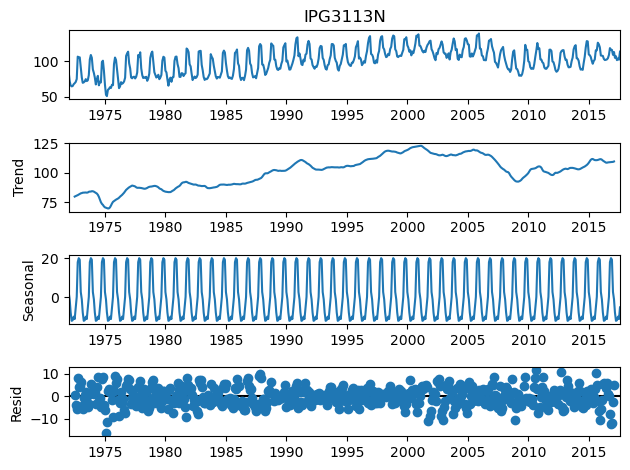

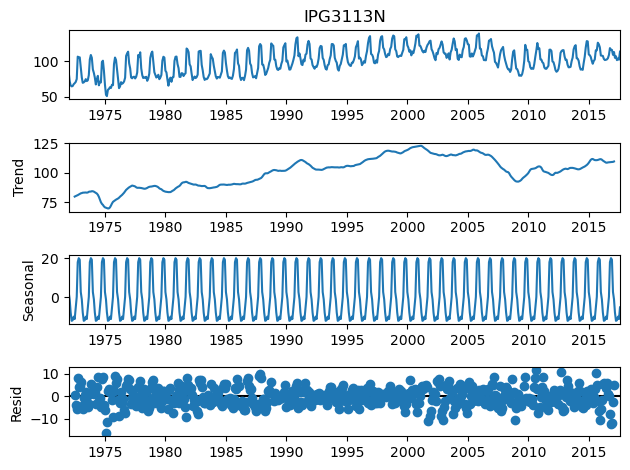

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_data = seasonal_decompose(indexed_df, model= 'additive')
decomposed_data.plot()

In [7]:
def stationarity_test(ts):
    import matplotlib.pyplot as plt
    ts.dropna(inplace= True)
    rolmean = ts.rolling(window = 12).mean()
    rolstd = ts.rolling(window = 12).std()

    orig = plt.plot(ts, label = 'Original')
    mean = plt.plot(rolmean, label = 'Mean')
    std= plt.plot(rolstd, label = 'Std')

    plt.legend(loc = 'best')
    plt.title('Timeseries data with rolling mean and std')
    plt.show()

    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(ts)
    dfout = pd.Series(dftest[0:4], index= ['The test statistics', 'Mac"s p-value', '#usedLags', 'NOBS'])
    print(dfout)

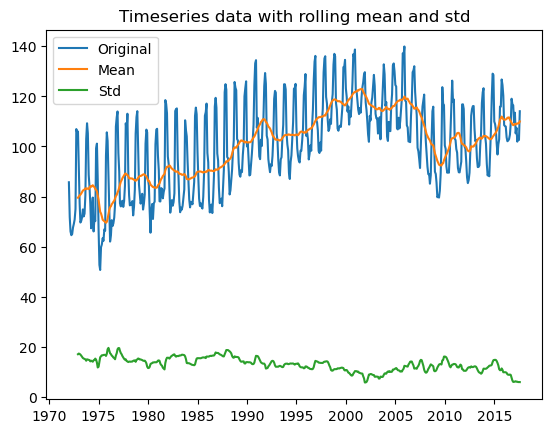

The test statistics     -1.887050
Mac"s p-value            0.338178
#usedLags               14.000000
NOBS                   533.000000
dtype: float64


In [8]:
stationarity_test(indexed_df)